<a href="https://www.kaggle.com/code/mohammedmohsen0404/airbnb-cleaned-europe-prediction?scriptVersionId=188648914" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

---
**<center><h1>Airbnb Cleaned Europe Prediction</h1></center>**
<center><h3>Learning ML, DL through 100 Practical Projects</h3></center>

---

#**Import Libraries and Data**
---

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm, skew
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [3]:
D = pd.read_csv('/kaggle/input/airbnb-cleaned-europe-dataset/Aemf1.csv')
data = D.copy()

# **Take a look at the data**
---

In [4]:
data.head()

,City,Price,Day,Room Type,Shared Room,Private Room,Person Capacity,Superhost,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restraunt Index,Normalised Restraunt Index
0,Amsterdam,194.033698,Weekday,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473
1,Amsterdam,344.245776,Weekday,Private room,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928
2,Amsterdam,264.101422,Weekday,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700
3,Amsterdam,433.529398,Weekday,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565
4,Amsterdam,485.552926,Weekday,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41714 entries, 0 to 41713
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   City                         41714 non-null  object 
 1   Price                        41714 non-null  float64
 2   Day                          41714 non-null  object 
 3   Room Type                    41714 non-null  object 
 4   Shared Room                  41714 non-null  bool   
 5   Private Room                 41714 non-null  bool   
 6   Person Capacity              41714 non-null  float64
 7   Superhost                    41714 non-null  bool   
 8   Multiple Rooms               41714 non-null  int64  
 9   Business                     41714 non-null  int64  
 10  Cleanliness Rating           41714 non-null  float64
 11  Guest Satisfaction           41714 non-null  float64
 12  Bedrooms                     41714 non-null  int64  
 13  City Center (km)

In [6]:
data.describe()

,Price,Person Capacity,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restraunt Index,Normalised Restraunt Index
count,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000
mean,260.094423,3.237235,0.295273,0.341180,9.442274,93.103179,1.165939,2.679792,0.603921,293.905990,11.719658,626.692618,25.553590
std,279.408493,1.299459,0.456171,0.474112,0.889173,8.141745,0.638157,1.996684,0.706206,235.750055,8.379161,520.644720,18.484572
min,34.779339,2.000000,0.000000,0.000000,2.000000,20.000000,0.000000,0.015045,0.002301,15.152201,0.926301,19.576924,0.592757
25%,144.016085,2.000000,0.000000,0.000000,9.000000,90.000000,1.000000,1.275913,0.236693,124.371614,5.510735,210.459574,11.132052
50%,203.819274,3.000000,0.000000,0.000000,10.000000,95.000000,1.000000,2.253237,0.391220,228.920599,9.951086,519.583509,21.814414
75%,297.373358,4.000000,1.000000,1.000000,10.000000,98.000000,1.000000,3.584489,0.678702,394.000201,15.467009,860.708156,36.821356
max,18545.450285,6.000000,1.000000,1.000000,10.000000,100.000000,10.000000,25.284557,14.273577,4513.563486,100.000000,6696.156772,100.000000


In [7]:
data.select_dtypes(include=['object']).describe()

,City,Day,Room Type
count,41714,41714,41714
unique,9,2,3
top,Rome,Weekday,Entire home/apt
freq,9027,20886,28264


In [8]:
data['Price'].describe()

count    41714.000000
mean       260.094423
std        279.408493
min         34.779339
25%        144.016085
50%        203.819274
75%        297.373358
max      18545.450285
Name: Price, dtype: float64

# **Exploratory Data Analysis**
---

**Univariate Analysis**

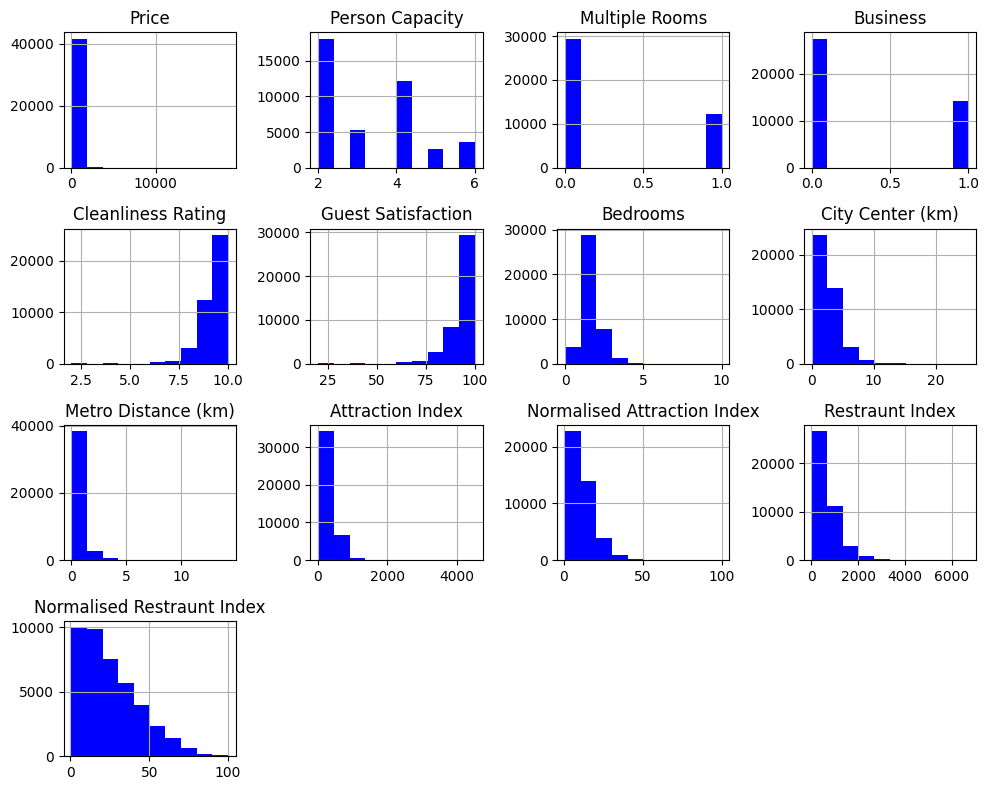

In [9]:
numerical_data = data.select_dtypes(include='number')
numerical_data.hist(figsize=(10, 8),color = 'b')
plt.tight_layout()
plt.show()

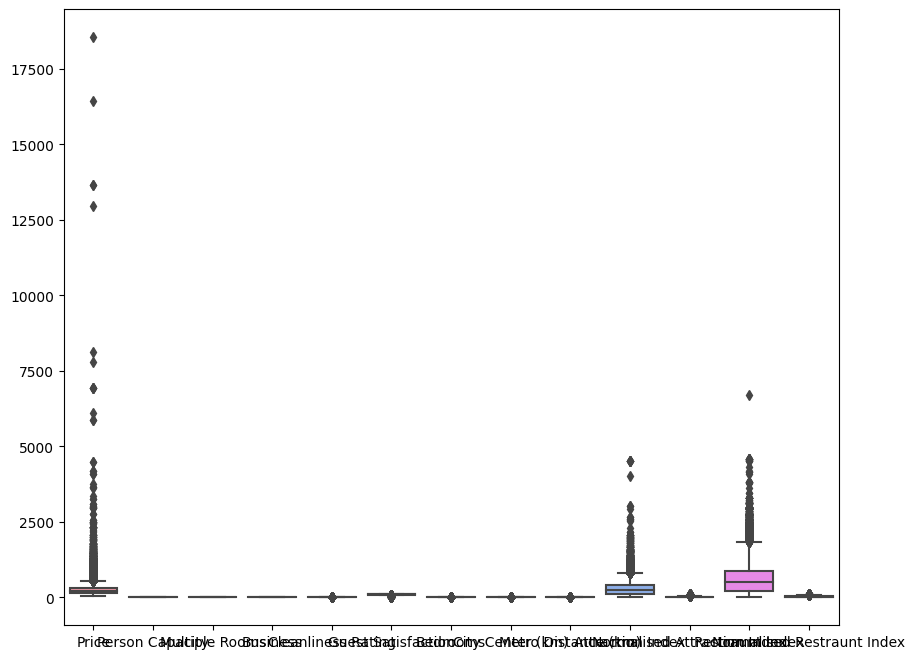

In [10]:
plt.figure(figsize=(10, 8))
sns.boxplot(numerical_data)
plt.show()

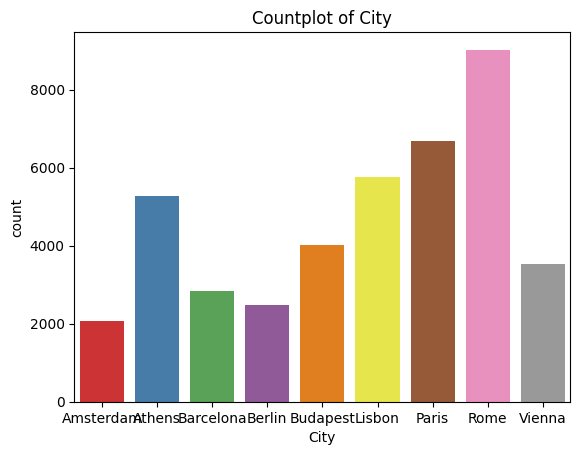

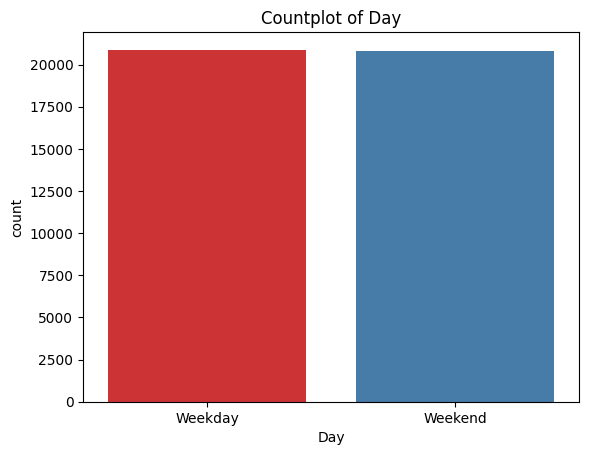

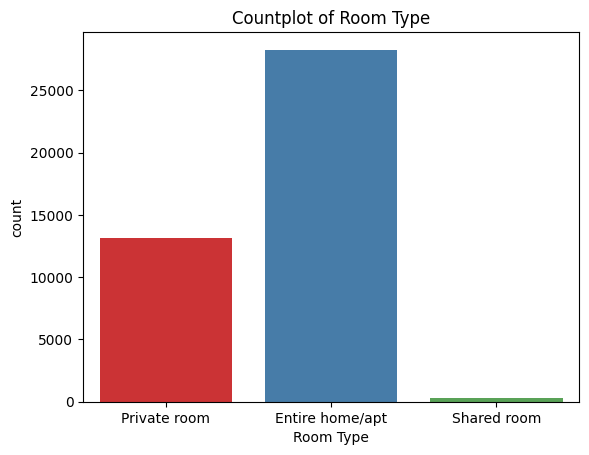

In [11]:
categorical_data = data.select_dtypes(include='object')
for column in categorical_data.columns:
    sns.countplot(data=categorical_data, x=column, palette="Set1")
    plt.title(f"Countplot of {column}")
    plt.show()

**Multivariate Analysis**

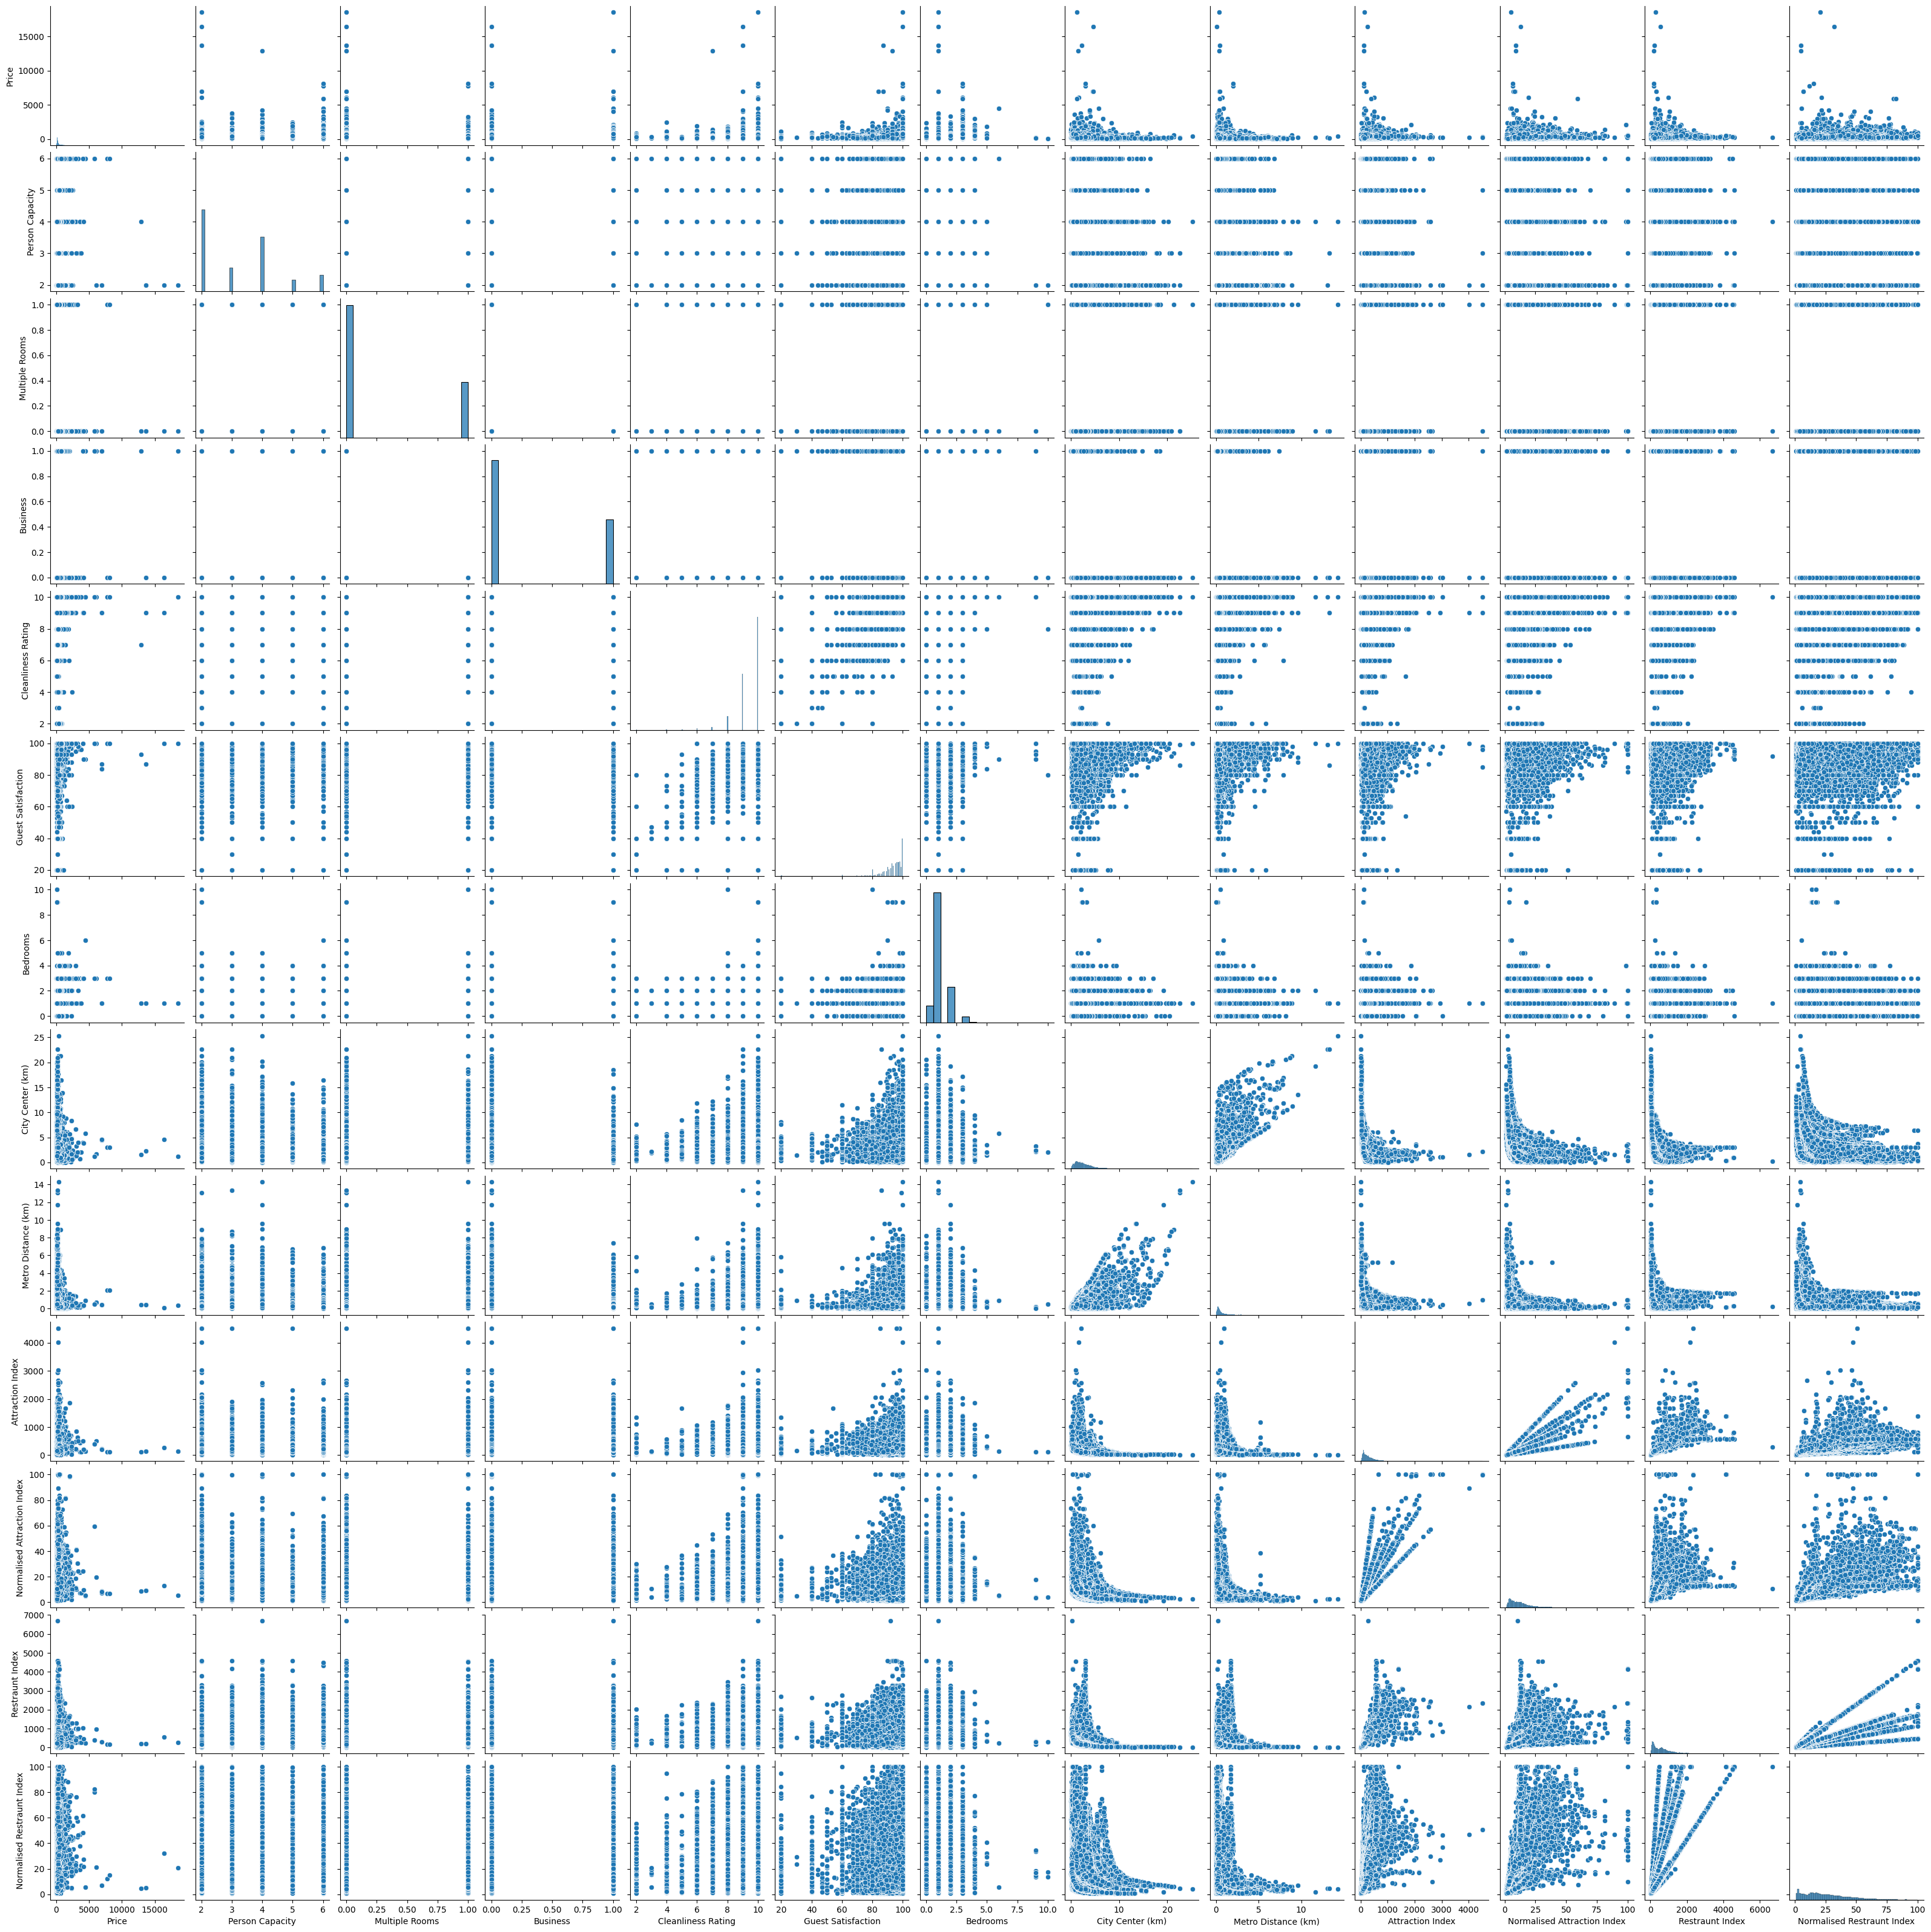

In [12]:
sns.pairplot(data.select_dtypes(include='number'))
plt.show()

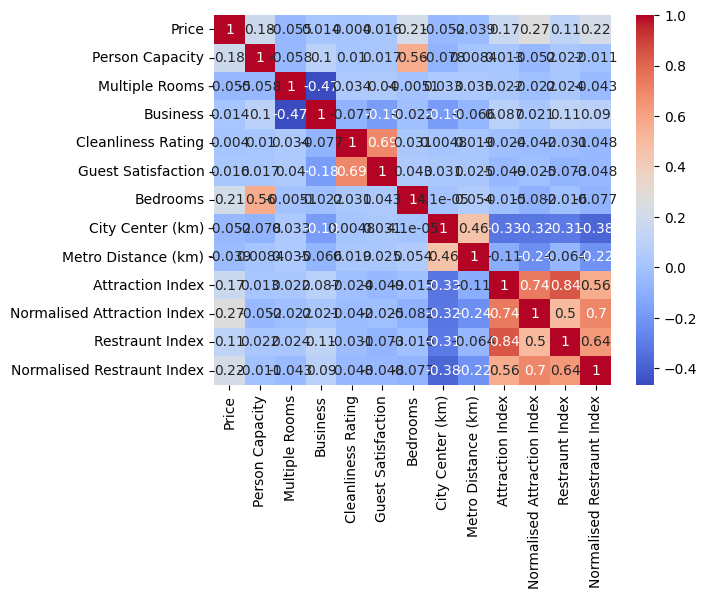

In [13]:
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm')
plt.show()

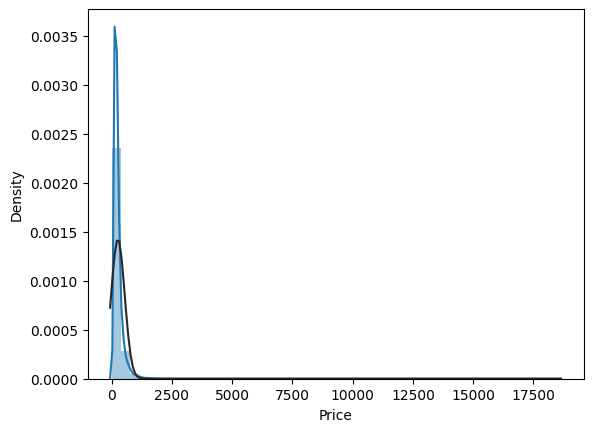

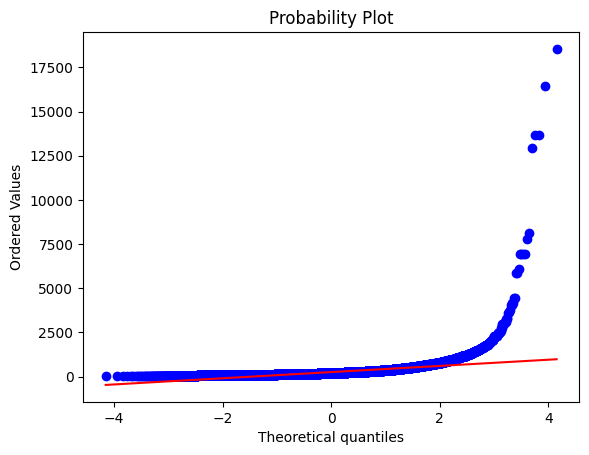

In [14]:
sns.distplot(data['Price'],fit = stats.norm)
fig = plt.figure()
res = stats.probplot(data['Price'], plot=plt)

# **Data Cleaning**
---

**Handling Duplicate Rows**

In [15]:
# Check for duplicate rows
duplicate_rows = data.duplicated()
# Count of duplicate rows
print(f"Number of duplicate rows: {duplicate_rows.sum()}")

Number of duplicate rows: 0


**Handling Missing Data**

In [16]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
City,0,0.0
Cleanliness Rating,0,0.0
Restraunt Index,0,0.0
Normalised Attraction Index,0,0.0
Attraction Index,0,0.0
Metro Distance (km),0,0.0
City Center (km),0,0.0
Bedrooms,0,0.0
Guest Satisfaction,0,0.0
Business,0,0.0


In [17]:
total = data.isnull().sum().sum()
print('Total Null values =' ,total)

Total Null values = 0


# **Data Preprocessing**
---

**Formatting**

In [18]:
data['Shared Room'] = data['Shared Room'].astype(int)
data['Private Room'] = data['Private Room'].astype(int)
data['Superhost'] = data['Superhost'].astype(int)

**Dealing with Outliers**

In [19]:
data['Price']=np.log1p(data['Price'])
data['Price']=np.sqrt(data['Price'])

In [20]:
col_outlier = ['Price', 'City Center (km)', 'Metro Distance (km)',
               'Attraction Index', 'Normalised Attraction Index',
               'Restraunt Index', 'Normalised Restraunt Index']

In [21]:
for col in col_outlier:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)

    IQR = Q3 - Q1

    limit_low = Q1 - IQR * 1.7
    limit_high = Q3 + IQR * 1.7

    data = data[(data[col] >= limit_low) & (data[col] <= limit_high)]


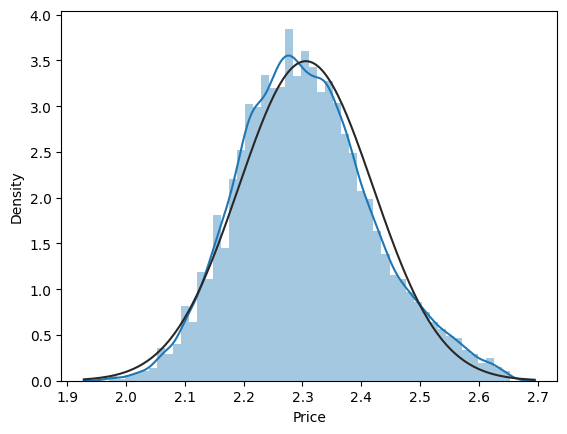

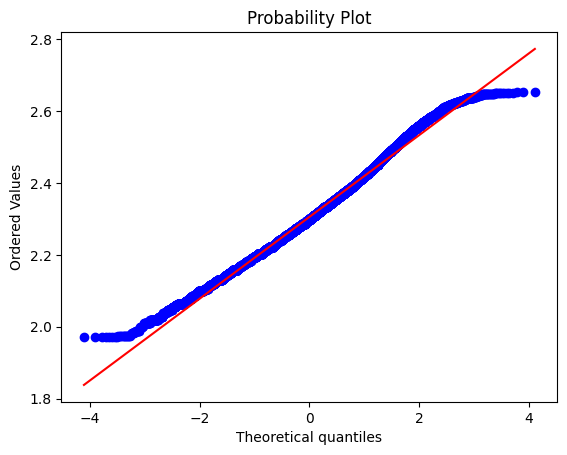

In [22]:
sns.distplot(data['Price'],fit = stats.norm)
fig = plt.figure()
res = stats.probplot(data['Price'], plot=plt)

**Encoding Categorical Variables**

In [23]:
list_str = data.select_dtypes(include = 'object').columns
le = LabelEncoder()

for c in list_str:
    data[c] = le.fit_transform(data[c])

<Axes: >

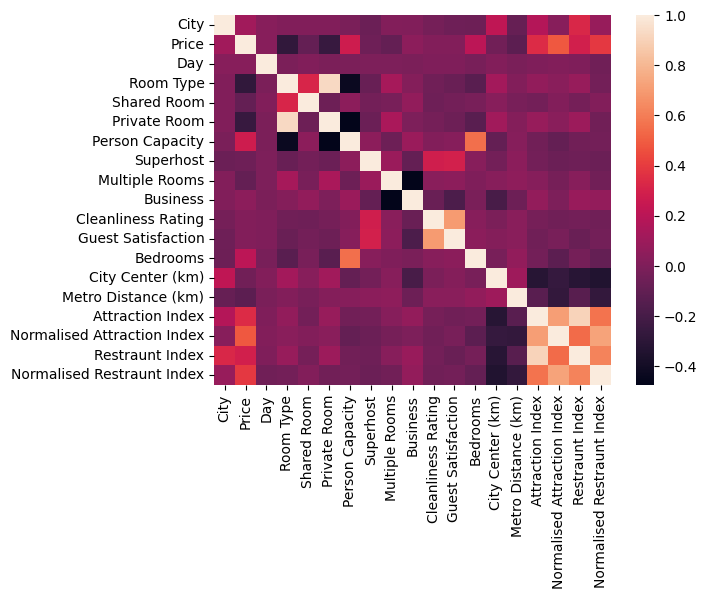

In [24]:
sns.heatmap(data.corr())

**Data splitting**

In [25]:
X = data.drop(['Price','Shared Room','Private Room',
             'Superhost','Attraction Index','Restraunt Index', 'Day',
             'Cleanliness Rating'], axis = 1)
y = data['Price']

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.30, random_state = 11)

# **Modeling**

In [26]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
import xgboost as XGB


In [27]:
regressors = [
    ('Linear Regression', LinearRegression()),
    ('Ridge Regression', Ridge(random_state=42)),
    ('Lasso Regression', Lasso(random_state=42)),
    ('Decision Tree Regressor', DecisionTreeRegressor(random_state=42)),
    ('Random Forest Regressor', RandomForestRegressor(random_state=42)),
    ('K-Nearest Neighbors Regressor', KNeighborsRegressor()),
    ('Gradient Boosting Regressor', GradientBoostingRegressor(random_state=42)),
    ('XGBRegressor',XGB.XGBRegressor(random_state=42))
]

In [28]:
for clf_name, clf in regressors:
    clf.fit(xtrain, ytrain)
    y_pred = clf.predict(xtest)
    print(f'{clf_name}:')
    print('R2 Score: ', r2_score(ytest, y_pred))
    print("MSE: ", mean_squared_error(ytest, y_pred))
    print("MAE: ", mean_absolute_error(ytest, y_pred))
    print('------------------------------------')


Linear Regression:
R2 Score:  0.4146396162450411
MSE:  0.0077433095287636105
MAE:  0.06850301277054319
------------------------------------
Ridge Regression:
R2 Score:  0.41463704615404984
MSE:  0.0077433435266401575
MAE:  0.06850327685104067
------------------------------------
Lasso Regression:
R2 Score:  -3.2497396064590234e-05
MSE:  0.013228707273435496
MAE:  0.0914563328448338
------------------------------------
Decision Tree Regressor:
R2 Score:  0.6419745745502036
MSE:  0.00473605964011665
MAE:  0.043216341396635556
------------------------------------
Random Forest Regressor:
R2 Score:  0.803621598178901
MSE:  0.0025977479724716727
MAE:  0.03705609212650184
------------------------------------
K-Nearest Neighbors Regressor:
R2 Score:  0.5590104846355888
MSE:  0.0058335316348219896
MAE:  0.0584497949643644
------------------------------------
Gradient Boosting Regressor:
R2 Score:  0.6897184507701328
MSE:  0.004104490401859746
MAE:  0.04938304510526844
-------------------------